# CMPE 257: Machine Learning

## ***Team Spartans:***

**Rishikesh Andhare**

**Jack Kalavadia**

**Rutvik Moradiya**

**Pramatha Nadig**


# Bike Sharing Demand Prediction


# Importing all dataasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

import pydotplus
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

from collections import Counter


In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
datasetUrl1 = 'https://drive.google.com/file/d/10wKdg9HnqQ_o9UZatlAsTMfiIpg8NtMq'
datasetUrl1 ='https://drive.google.com/uc?id=' + datasetUrl1.split('/')[-1]
data1 = pd.read_csv(datasetUrl1)
data1.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [4]:
datasetUrl2 = 'https://drive.google.com/file/d/1yVL1fUAfZ5ktpPbaAAF8zQrLlBAicgN7'
datasetUrl2 ='https://drive.google.com/uc?id=' + datasetUrl2.split('/')[-1]
data2 = pd.read_csv(datasetUrl2, encoding_errors='ignore')
data2.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes


In [5]:
data1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
data2.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [7]:
data2.rename(columns = {'Temperature(C)':'temp','Wind speed (m/s)':'windspeed','Humidity(%)':'hum', 'Rented Bike Count':'cnt','Hour':'hr','Solar Radiation (MJ/m2)':'solarRadiation','Date':'dteday','Holiday':'holiday','Functioning Day':'workingday','Seasons':'season'}, inplace = True)

In [8]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes


# Data Preparation and wrangling

In [9]:
data1.workingday.replace( (1, 0),('Yes', 'No'), inplace=True)

In [10]:
data2.holiday.replace(('Holiday', 'No Holiday'), (1, 0), inplace=True)

In [11]:
data1.season.replace( (1,2,3,4),('Winter', 'Autumn','Summer','Spring'), inplace=True)

In [12]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [13]:
data1=data1.drop(['instant'],axis=1)

In [14]:
data1.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,0,1,0,0,6,No,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2011-01-01,Winter,0,1,1,0,6,No,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,2011-01-01,Winter,0,1,2,0,6,No,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,2011-01-01,Winter,0,1,3,0,6,No,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,2011-01-01,Winter,0,1,4,0,6,No,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [15]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [16]:
data1.dteday.head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object

In [17]:
pd.to_datetime(data1.dteday.head()).dt.month,
pd.to_datetime(data1.dteday.head()).dt.day,
pd.to_datetime(data1.dteday.head()).dt.year

0    2011
1    2011
2    2011
3    2011
4    2011
Name: dteday, dtype: int64

In [18]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [19]:
df = data1.merge(data2, on = ['cnt','hr','temp','hum','windspeed','dteday','holiday','workingday','season'], how = 'outer')

In [20]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm)
0,2011-01-01,Winter,0.000000,1.000000,0,0,6.000000,No,1.000000,0.240000,0.287900,0.810000,0.000000,3.000000,13.000000,16,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,Winter,0.000000,1.000000,1,0,6.000000,No,1.000000,0.220000,0.272700,0.800000,0.000000,8.000000,32.000000,40,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,Winter,0.000000,1.000000,2,0,6.000000,No,1.000000,0.220000,0.272700,0.800000,0.000000,5.000000,27.000000,32,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,Winter,0.000000,1.000000,3,0,6.000000,No,1.000000,0.240000,0.287900,0.750000,0.000000,3.000000,10.000000,13,NaN,NaN,NaN,NaN,NaN
4,2011-01-01,Winter,0.000000,1.000000,4,0,6.000000,No,1.000000,0.240000,0.287900,0.750000,0.000000,0.000000,1.000000,1,NaN,NaN,NaN,NaN,NaN


In [21]:
df=df.drop(['registered','atemp','yr','mnth','weekday','Visibility (10m)','Dew point temperature(C)','solarRadiation','Snowfall (cm)','Rainfall(mm)','casual','weathersit'],axis=1)

In [22]:
df.head()

,dteday,season,hr,holiday,workingday,temp,hum,windspeed,cnt
0,2011-01-01,Winter,0,0,No,0.240000,0.810000,0.000000,16
1,2011-01-01,Winter,1,0,No,0.220000,0.800000,0.000000,40
2,2011-01-01,Winter,2,0,No,0.220000,0.800000,0.000000,32
3,2011-01-01,Winter,3,0,No,0.240000,0.750000,0.000000,13
4,2011-01-01,Winter,4,0,No,0.240000,0.750000,0.000000,1


In [23]:
pd.to_datetime(data1.dteday.head()).dt.month,
pd.to_datetime(data1.dteday.head()).dt.day,
pd.to_datetime(data1.dteday.head()).dt.year

0    2011
1    2011
2    2011
3    2011
4    2011
Name: dteday, dtype: int64

In [24]:
df["month"]=pd.to_datetime(df.dteday).dt.month

In [25]:
df["day"]=pd.to_datetime(df.dteday).dt.day
df["year"]=pd.to_datetime(df.dteday).dt.year

In [26]:
df.head()

,dteday,season,hr,holiday,workingday,temp,hum,windspeed,cnt,month,day,year
0,2011-01-01,Winter,0,0,No,0.240000,0.810000,0.000000,16,1,1,2011
1,2011-01-01,Winter,1,0,No,0.220000,0.800000,0.000000,40,1,1,2011
2,2011-01-01,Winter,2,0,No,0.220000,0.800000,0.000000,32,1,1,2011
3,2011-01-01,Winter,3,0,No,0.240000,0.750000,0.000000,13,1,1,2011
4,2011-01-01,Winter,4,0,No,0.240000,0.750000,0.000000,1,1,1,2011


In [27]:
df=df.drop(['dteday'],axis=1)

In [28]:
df.dtypes

season         object
hr              int64
holiday         int64
workingday     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
month           int64
day             int64
year            int64
dtype: object

In [29]:
df.to_csv("dataset3.csv",index=False)

## Remove Insignificant variables

In [30]:
df_cat = df.select_dtypes(include=[np.object])
df_cat.head()

,season,workingday
0,Winter,No
1,Winter,No
2,Winter,No
3,Winter,No
4,Winter,No


In [31]:
cols = list(df.columns)

<Axes: xlabel='workingday', ylabel='count'>

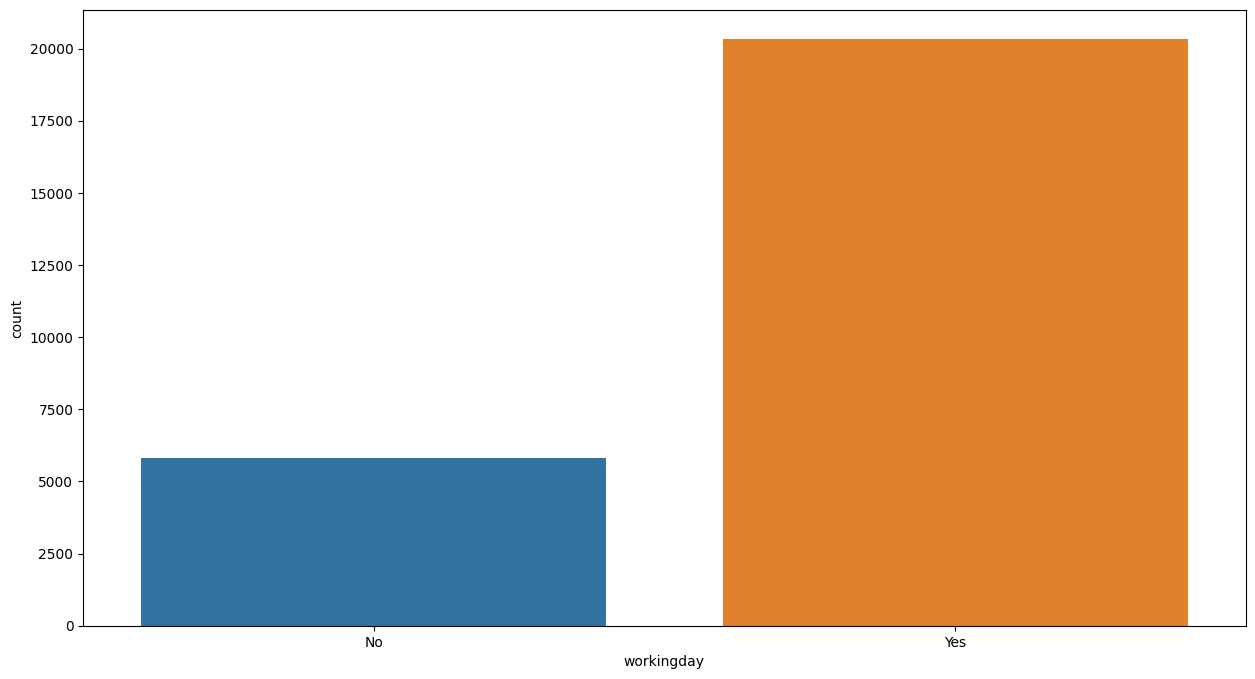

In [32]:
sns.countplot(x='workingday',data=df_cat)

<Axes: xlabel='season', ylabel='count'>

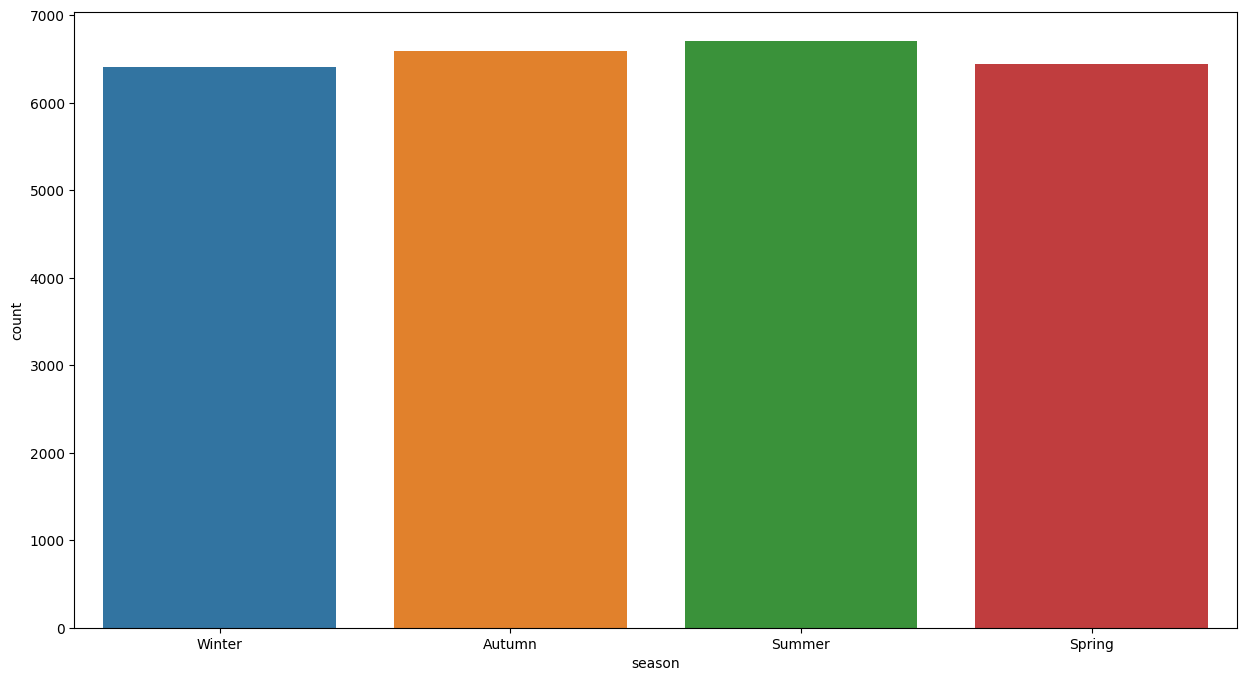

In [33]:
sns.countplot(x='season',data=df_cat)

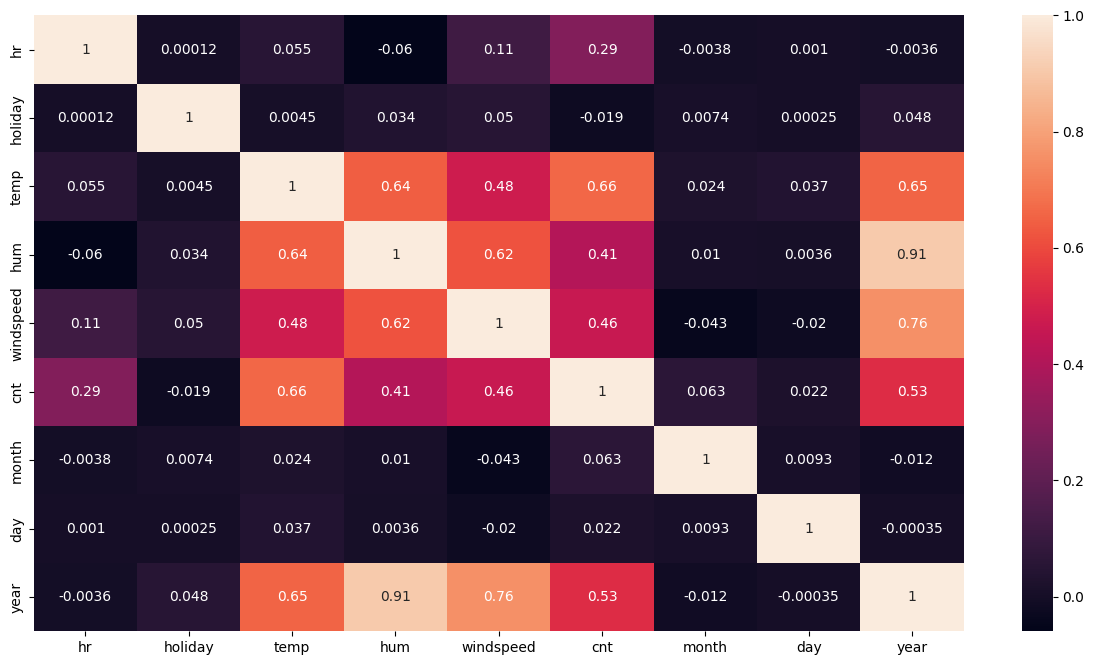

In [34]:
sns.heatmap(df.corr(),annot = True,color = 'r')
plt.show()

## Variables Distribution

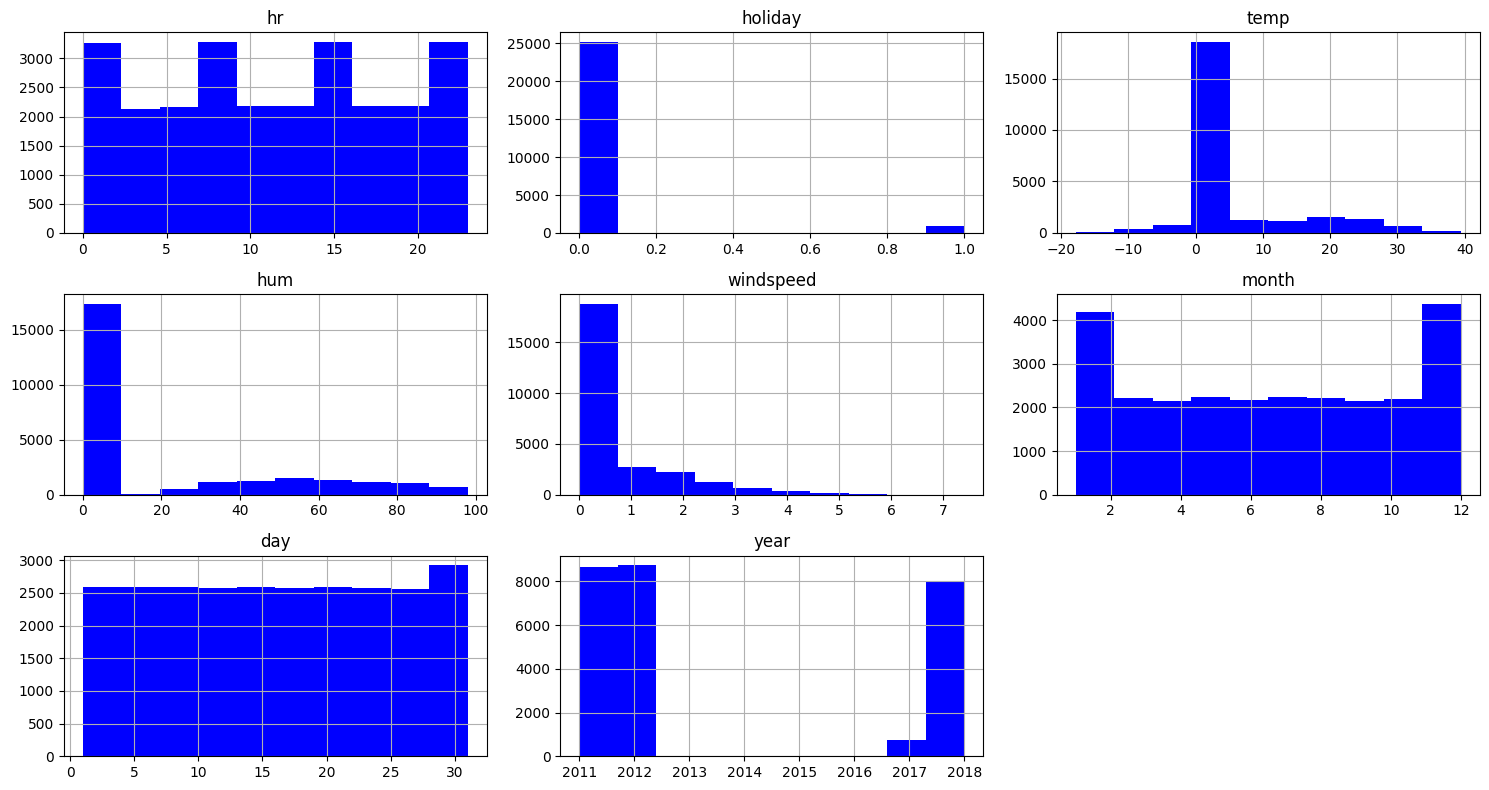

Skewness:


hr          -0.007103
holiday      5.008592
temp         1.625359
hum          1.159319
windspeed    1.990985
month       -0.009671
day          0.010786
year         0.650560
dtype: float64

In [35]:
df.drop('cnt', axis = 1).hist(color = "b")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

df.drop('cnt', axis = 1).skew()

## Missing Values

In [36]:
Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
season,0,0.000000
hr,0,0.000000
holiday,0,0.000000
workingday,0,0.000000
temp,0,0.000000
hum,0,0.000000
windspeed,0,0.000000
cnt,0,0.000000
month,0,0.000000
day,0,0.000000


## Ploting variable Based on boxplots

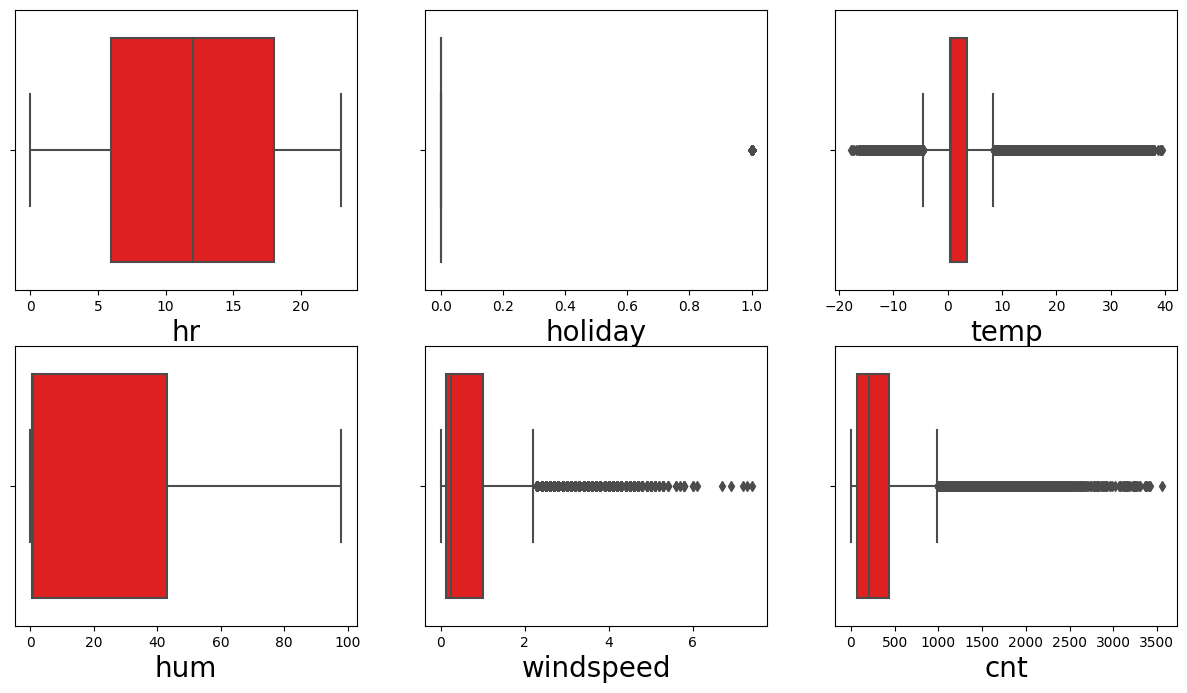

In [37]:
df_num = df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], ax=subplot,color='red', orient = "h",whis=1.5) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

In [38]:
lower = df_num.temp.quantile(0.25)
upper = df_num.temp.quantile(0.75)

IQR = upper - lower

# print the IQR
print(IQR)
df_num = df_num[~((df_num.temp < (lower - 1.5 * IQR)) |(df_num.temp > (upper + 1.5 * IQR)))]

3.24


In [39]:
lower = df_num.hum.quantile(0.25)

upper = df_num.hum.quantile(0.75)
IQR = upper - lower

print(IQR)
df_num = df_num[~((df_num.hum < (lower - 1.5 * IQR)) |(df_num.hum > (upper + 1.5 * IQR)))]

0.37


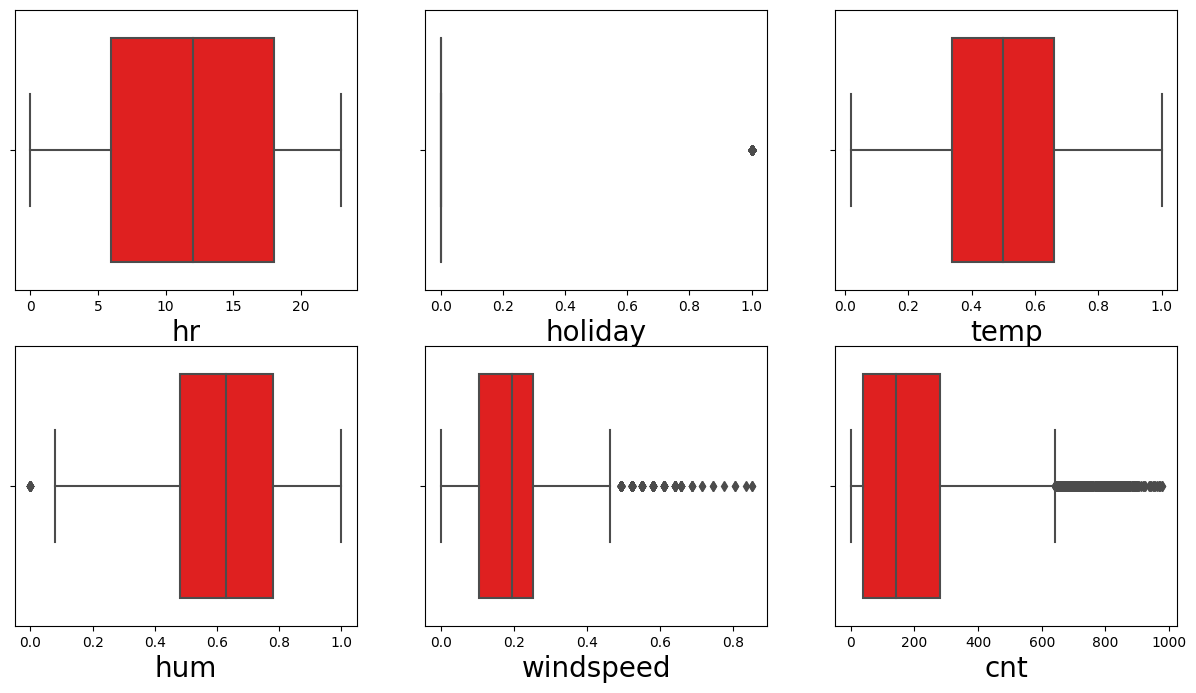

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], ax=subplot,color='red', orient = "h",whis=1.5 )
    z.set_xlabel(variable, fontsize = 20)

## Mock Encode

In [41]:
df_target = df['cnt']
df_feature = df.drop(['cnt','holiday'], axis = 1)
df_num = df_feature.select_dtypes(include = [np.number])
df_num.head()

,hr,temp,hum,windspeed,month,day,year
0,0,0.240000,0.810000,0.000000,1,1,2011
1,1,0.220000,0.800000,0.000000,1,1,2011
2,2,0.220000,0.800000,0.000000,1,1,2011
3,3,0.240000,0.750000,0.000000,1,1,2011
4,4,0.240000,0.750000,0.000000,1,1,2011


In [42]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

## Data Scaling And Train_Test Spliting
Before employing diverse classification methods to forecast student admission outcomes, let's divide the dataset into training and testing sets.

In [43]:
target = df['holiday']X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [45]:
X = pd.concat([df_num, dummy_var], axis = 1)
#X.drop("Sold",axis = 1,inplace = True)
X.head()

,hr,temp,hum,windspeed,month,day,year,season_Spring,season_Summer,season_Winter,workingday_Yes
0,0,0.240000,0.810000,0.000000,1,1,2011,0,0,1,0
1,1,0.220000,0.800000,0.000000,1,1,2011,0,0,1,0
2,2,0.220000,0.800000,0.000000,1,1,2011,0,0,1,0
3,3,0.240000,0.750000,0.000000,1,1,2011,0,0,1,0
4,4,0.240000,0.750000,0.000000,1,1,2011,0,0,1,0


In [46]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.2)

y_train = np.round(y_train).astype(int)
y_test = np.round(y_test).astype(int)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (20911, 12)
y_train (20911,)
X_test (5228, 12)
y_test (5228,)


#  Decision Tree for Classification


In [47]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classifier.fit(X_train, y_train)

In [48]:
!pip install -q graphviz

## Finding Gini Scores
#### Making a full decision tree model using 'entropy'.

In [49]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

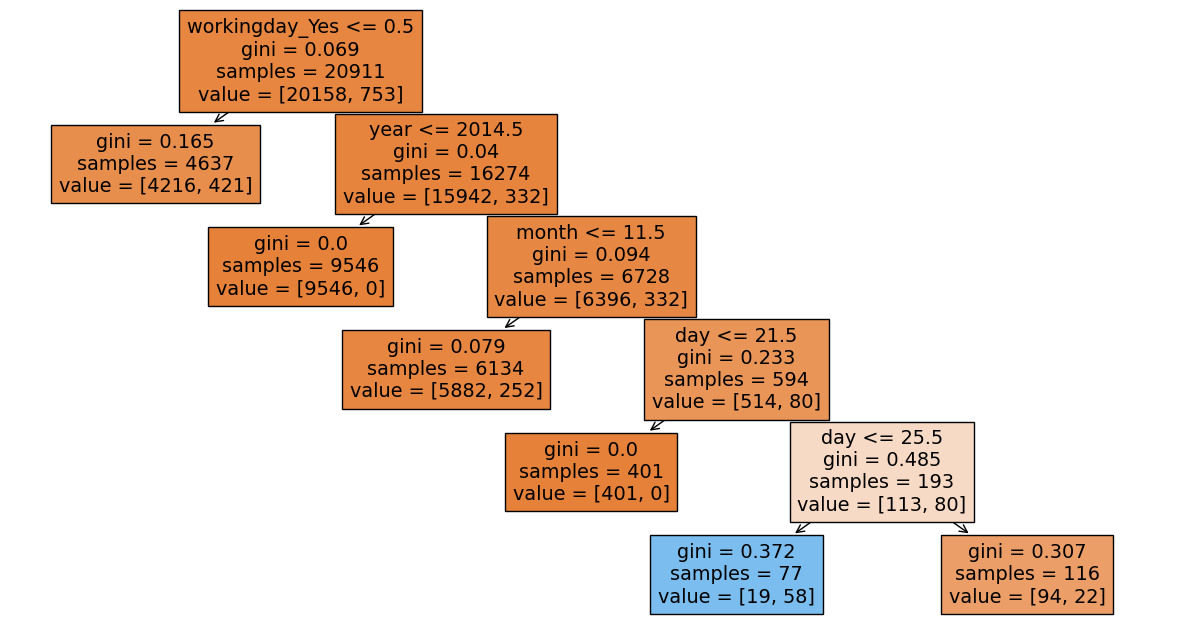

In [50]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=6,criterion='gini')

decision_tree = decision_tree.fit(X_train,y_train.astype(int))

labels = X_train.columns

dot_data = tree.plot_tree(decision_tree,filled = True,feature_names=X_train.columns)

## **Train Set Performance Evaluation**:
### Obtaining performance metrics on the training set using a decision tree model.



In [51]:
def get_train_report(model):
    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

In [52]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20158
           1       0.75      0.08      0.14       753

    accuracy                           0.97     20911
   macro avg       0.86      0.54      0.56     20911
weighted avg       0.96      0.97      0.95     20911



In [53]:
def get_test_report(model):

    test_pred = model.predict(X_test)
    report = classification_report(y_test, test_pred)
    #print(report)
    return(report, test_pred)

In [54]:
test_report_dt, y_pred_dt= get_test_report(decision_tree)

In [55]:
print('y_pred:',  y_pred_dt)

y_pred: [0 0 0 ... 0 0 0]


In [56]:
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5049
           1       0.74      0.08      0.14       179

    accuracy                           0.97      5228
   macro avg       0.85      0.54      0.56      5228
weighted avg       0.96      0.97      0.95      5228



## **Hyperparameter Tuning to Mitigate Overfitting:**

### 1. **Hyperparameter Grid and Model Initialization:**

Defining hyperparameters for decision tree tuning to address overfitting.
Initializing a decision tree model with specified hyperparameters.

### 2. **Model Training and Performance Evaluation:**

Training the decision tree model on the training data.
Assessing model performance on both the training and test datasets.

In [57]:
tree_param_grid = {'criterion' :'gini',
'max_depth' :5,
'min_samples_split' : 4,
'max_leaf_nodes' : 6,
'random_state' : 10}

In [58]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X_train, y_train)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

test_report_dt = get_test_report(decision_tree)
print('Test data:\n', test_report_dt)

Train data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     20158
           1       0.75      0.08      0.14       753

    accuracy                           0.97     20911
   macro avg       0.86      0.54      0.56     20911
weighted avg       0.96      0.97      0.95     20911

Test data:
 ('              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      5049\n           1       0.74      0.08      0.14       179\n\n    accuracy                           0.97      5228\n   macro avg       0.85      0.54      0.56      5228\nweighted avg       0.96      0.97      0.95      5228\n', array([0, 0, 0, ..., 0, 0, 0]))


## Features Importance

In [59]:
def FeatureImp(model):
  imp_features = pd.DataFrame({'Features': X_train.columns,
                                    'Importance': dt_model.feature_importances_})

  imp_features = imp_features.sort_values('Importance', ascending = False)
  sns.barplot(x = 'Importance', y = 'Features', data = imp_features)

  plt.title('Feature Importance', fontsize = 15)
  plt.xlabel('Importance', fontsize = 15)
  plt.ylabel('Features', fontsize = 15)

  plt.show()

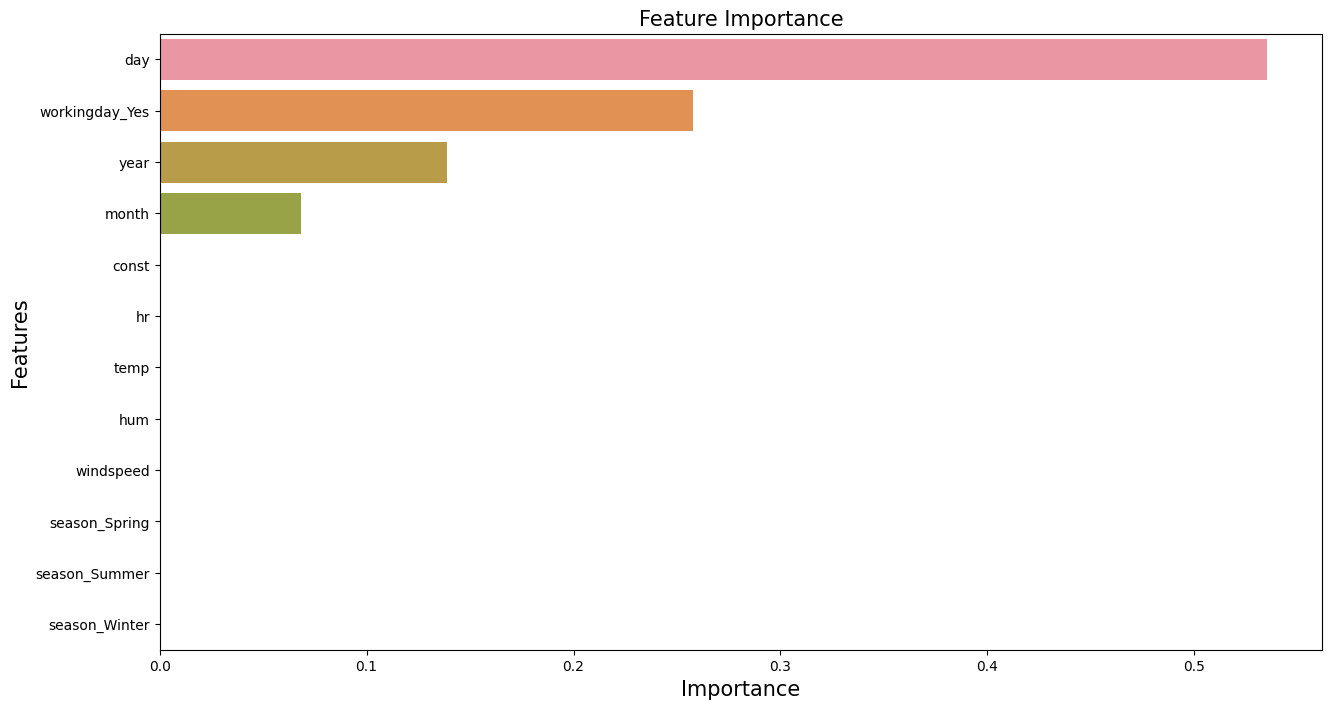

In [60]:
FeatureImp(dt_model)

<a id="rf"></a>
# 4. Random Forest for Classification Model
Initializing and training a Random Forest classifier with 10 estimators and a random state of 10.



In [61]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

**Calculate performance for train set.**

In [62]:
train_report = get_train_report(rf_model)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20158
           1       1.00      0.99      0.99       753

    accuracy                           1.00     20911
   macro avg       1.00      0.99      1.00     20911
weighted avg       1.00      1.00      1.00     20911



<a id="hyper_rf"></a>
## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [63]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 25],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification,
                       param_grid = tuned_paramaters,
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)

print('Random forest classifier top paramters list: ', rf_grid_model.best_params_,)

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10} 



In [64]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
 ('              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      5049\n           1       0.00      0.00      0.00       179\n\n    accuracy                           0.97      5228\n   macro avg       0.48      0.50      0.49      5228\nweighted avg       0.93      0.97      0.95      5228\n', array([0, 0, 0, ..., 0, 0, 0]))


### Features Importance RF Model

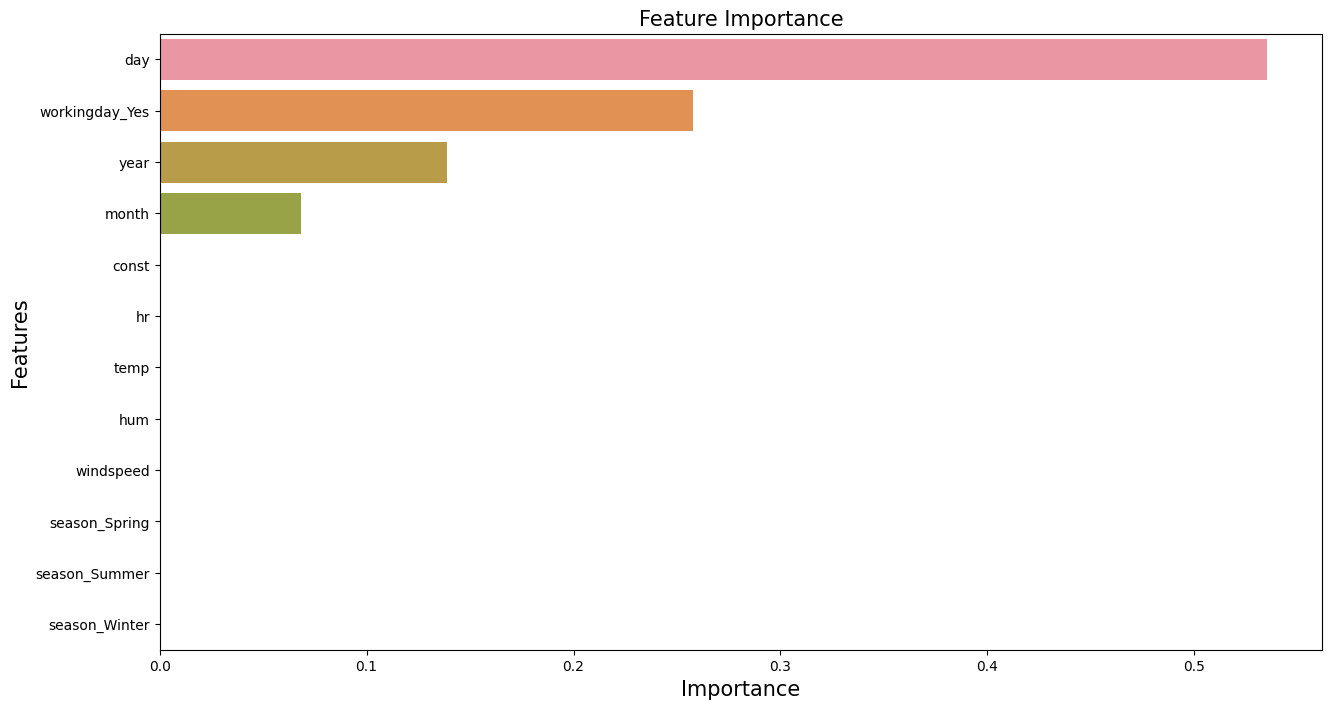

In [65]:
FeatureImp(rf_model)

In [66]:
train_report = get_train_report(rf_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20158
           1       0.00      0.00      0.00       753

    accuracy                           0.96     20911
   macro avg       0.48      0.50      0.49     20911
weighted avg       0.93      0.96      0.95     20911



# Muller Classifier

Setting up a comparison of various machine learning classifiers, including k-Nearest Neighbors, Support Vector Machines with linear and RBF kernels, Decision Tree, Random Forest, Neural Network, AdaBoost, and Naive Bayes.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM","Decision Tree", "Random Forest", #"GridSearchCV",
    "Neural Net", "AdaBoost", "Naive Bayes"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [68]:
from sklearn import metrics

def muller_classification(X_train, X_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': [],
      'Recall':[],
      'Precision': []
      })
  global m_pred
  m_pred = {}

  for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
    r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
    test_acc = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    new_row = pd.DataFrame({
    'Classifier': name,
    'MSE' : mean_absolute_error,
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])

    m_pred[name] = {
        'y_pred' : y_pred,
        'y_test': y_test
    }

    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

  print('Best Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

  return metrics_df

In [69]:
metrics_df = muller_classification(X_train, X_test, y_train, y_test)
metrics_df.head(10)

Nearest Neighbors
Classifier = Nearest Neighbors, Score (test, accuracy) = 98.16,
Linear SVM
Classifier = Linear SVM, Score (test, accuracy) = 96.58,
RBF SVM
Classifier = RBF SVM, Score (test, accuracy) = 96.58,
Decision Tree
Classifier = Decision Tree, Score (test, accuracy) = 96.77,
Random Forest
Classifier = Random Forest, Score (test, accuracy) = 96.58,
Neural Net
Classifier = Neural Net, Score (test, accuracy) = 96.58,
AdaBoost
Classifier = AdaBoost, Score (test, accuracy) = 96.08,
Naive Bayes
Classifier = Naive Bayes, Score (test, accuracy) = 95.70,
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 98.16


,Classifier,MSE,MAE,RSquared,Test Accuracy,Recall,Precision
0,Naive Bayes,0.040000,0.040000,-0.300000,95.696251,0.956963,0.934118
1,AdaBoost,0.040000,0.040000,-0.190000,96.078806,0.960788,0.933925
2,Neural Net,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
3,Random Forest,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
4,Decision Tree,0.030000,0.030000,0.020000,96.767406,0.967674,0.961028
5,RBF SVM,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
6,Linear SVM,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
7,Nearest Neighbors,0.020000,0.020000,0.440000,98.163734,0.981637,0.980389


### Muller Loop Regressor

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
names = [
    "Linear Regression",
    "MLP Regressor",
    "RandomForest Regressor",
    "Gradient Boosting Regressor",
    "KNeighbors Regressor"
         ]

regressors = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2)
    ]

In [112]:
def muller_loop(x_train, x_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  metrics_df = pd.DataFrame({
      'Regressor': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, reg in zip(names, regressors):
      reg.fit(x_train, y_train)
      y_pred = reg.predict(x_test)
      score = 100.0 * reg.score(x_test, y_test)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
      r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
      new_row = pd.DataFrame({
      'Regressor': name,
      'MSE' : mean_absolute_error,
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)


      print('Regressor = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          reg_best = reg
          max_score = score
          max_class = name

  print('***** Best Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [72]:
muller_loop(X_train, X_test, y_train, y_test )

Regressor = Linear Regression, Score (test, accuracy) = 3.75,
Regressor = MLP Regressor, Score (test, accuracy) = -82.29,
Regressor = RandomForest Regressor, Score (test, accuracy) = 14.01,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 23.51,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 63.12,
Best --> Regressor = KNeighbors Regressor, Score (test, accuracy) = 63.12


Confusion matrix nd metrics

In [73]:
def confMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix = pd.DataFrame(data = cm,columns = [f'Predicted:{i}' for i in range(2)], index = [f'Actual:{i}' for i in range(2)])
  return (cm, conf_matrix)

def plot_cm(conf_matrix):
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
              linewidths = 0.1, annot_kws = {'size':8})
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  plt.show()

In [74]:
cm_dt, conf_matrix_dt = confMatrix(y_test, y_pred_dt)

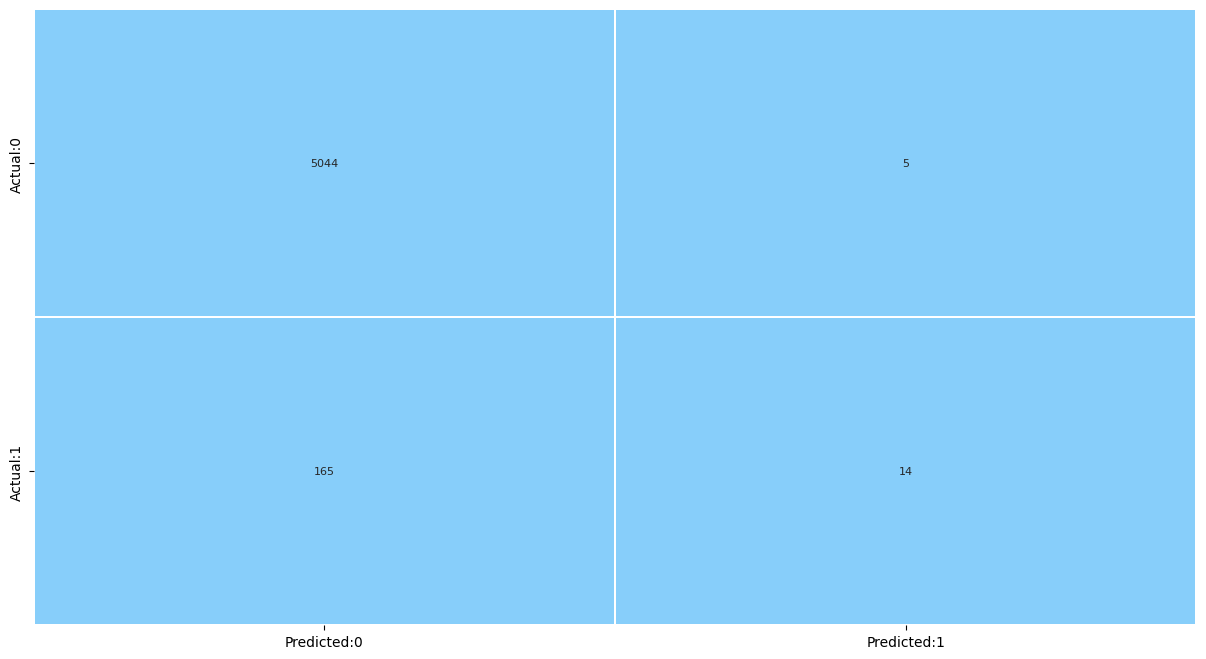

In [75]:
plot_cm(conf_matrix_dt)

In [76]:
def calculateMetrics(cm, y_test, y_pred):
  # True Negatives are denoted by 'TN'
  # Actual 'O' values which are classified correctly
  TN = cm[0,0]

  # True Positives are denoted by 'TP'
  # Actual '1' values which are classified correctly
  TP = cm[1,1]

  # False Positives are denoted by 'FP'
  # it is the type 1 error
  # Actual 'O' values which are classified wrongly as '1'
  FP = cm[0,1]

  # False Negatives are denoted by 'FN'
  # it is the type 2 error
  # Actual '1' values which are classified wrongly as '0'
  FN = cm[1,0]

  precision = TP / (TP+FP)
  recall = TP / (TP+FN)
  specificity = TN / (TN+FP)
  f1_score = 2*((precision*recall)/(precision+recall))
  accuracy = (TN+TP) / (TN+FP+FN+TP)
  acc_table = classification_report(y_test, y_pred)
  print(acc_table)


In [77]:
metrics_dt = calculateMetrics(cm_dt, y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5049
           1       0.74      0.08      0.14       179

    accuracy                           0.97      5228
   macro avg       0.85      0.54      0.56      5228
weighted avg       0.96      0.97      0.95      5228



In [113]:
def ROC(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  plt.plot(fpr, tpr)

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.plot([0, 1], [0, 1],'r--')
  plt.title('ROC', fontsize = 15)
  plt.xlabel('False rate 1-Specificity', fontsize = 15)
  plt.ylabel('True rate Sensitivity', fontsize = 15)

  plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
  plt.grid(True)

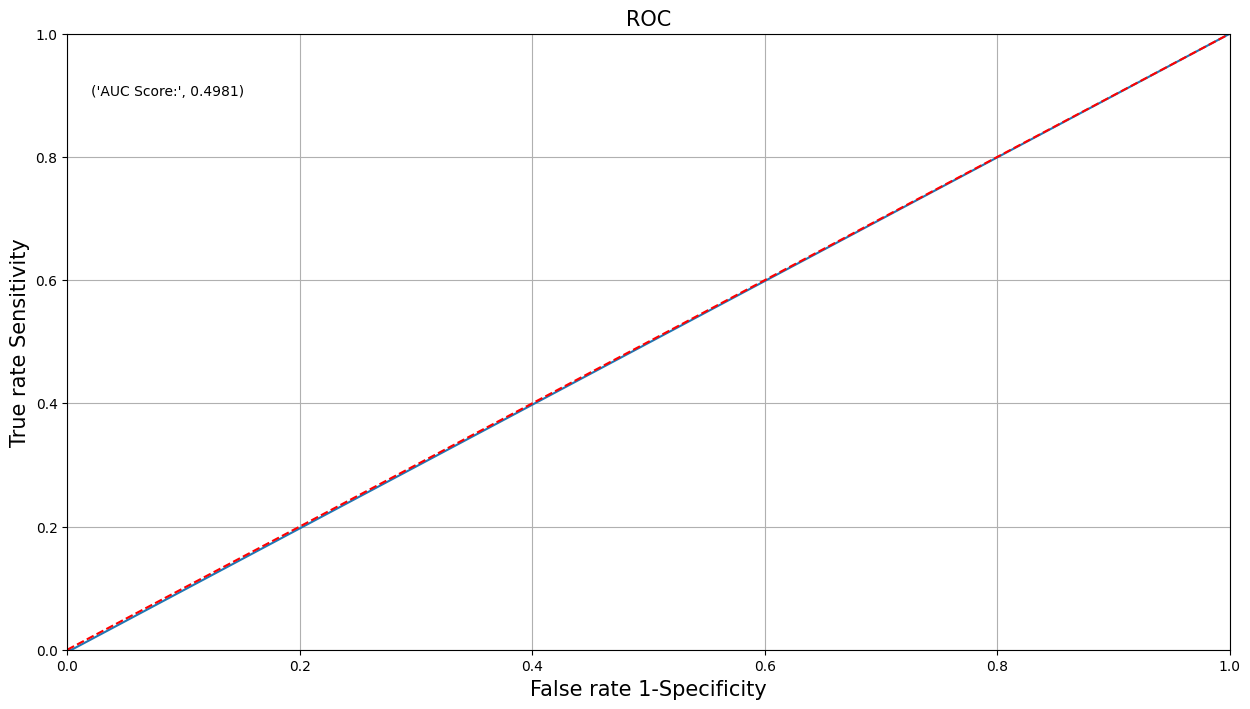

In [114]:
ROC(y_test,y_pred_dt)

### Class Imbalance Handling and Evaluation

class imbalance by using SMOTE for oversampling and RandomUnderSampler for undersampling, followed by storing evaluation metrics (precision, recall, F1 score, and AUC-ROC) for various models.

In [80]:
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

In [81]:
counter = Counter(y_train)
print('Before',counter)
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 20158, 1: 753})
After Counter({0: 20158, 1: 20158})


In [82]:
counter1 = Counter(y_train)
print('Before',counter1)

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
counter1 = Counter(y_train_rus)
print('After',counter1)

Before Counter({0: 20158, 1: 753})
After Counter({0: 753, 1: 753})


In [115]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

### Original Data

In [117]:
estimators = [2,10,30,50,100]
max_depth = [i for i in range(5,16,2)]
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
min_samples_leaf = [1, 2, 5]

tree_param_grid = {
'max_depth' :max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf
}
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [118]:
clf_DT = RandomizedSearchCV(dt_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, max_leaf_nodes=6, min_samples_split=100,
                       random_state=10)

### **Evaluate Decision Tree Classifier on Test Data**

In [88]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[5044    5]
 [ 165   14]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5049
           1       0.74      0.08      0.14       179

    accuracy                           0.97      5228
   macro avg       0.85      0.54      0.56      5228
weighted avg       0.96      0.97      0.95      5228
 

AUC-ROC
0.8117581776799654


In [89]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, max_leaf_nodes=6, min_samples_leaf=5,
                       min_samples_split=100, random_state=10)

In [90]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[3586 1463]
 [  20  159]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      5049
           1       0.10      0.89      0.18       179

    accuracy                           0.72      5228
   macro avg       0.55      0.80      0.50      5228
weighted avg       0.96      0.72      0.81      5228
 

AUC-ROC
0.8315148417021567


### **Random Under Sampling**

In [91]:
clf_DT.fit(X_train_rus, y_train_rus)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, max_leaf_nodes=6, random_state=10)

In [92]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'RandomUnderSampler')

Confusion Matrix
[[2757 2292]
 [   0  179]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      5049
           1       0.07      1.00      0.14       179

    accuracy                           0.56      5228
   macro avg       0.54      0.77      0.42      5228
weighted avg       0.97      0.56      0.69      5228
 

AUC-ROC
0.8188650664825492


Random Forest

In [120]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Confusion Matrix
[[5024    0]
 [  54  150]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5024
           1       1.00      0.74      0.85       204

    accuracy                           0.99      5228
   macro avg       0.99      0.87      0.92      5228
weighted avg       0.99      0.99      0.99      5228
 

AUC-ROC
0.9993599350568253


### **SMOTE Resampling and Evaluation**
#### Random Forest Model

In [95]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=30)

In [96]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[4985   64]
 [  14  165]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5049
           1       0.72      0.92      0.81       179

    accuracy                           0.99      5228
   macro avg       0.86      0.95      0.90      5228
weighted avg       0.99      0.99      0.99      5228
 

AUC-ROC
0.9964526412111033


**Random Under Sampling**

In [97]:
clf_RF.fit(X_train_rus, y_train_rus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=11, min_samples_split=5)

In [98]:
test_eval(clf_RF, X_test, y_test, 'Decision Tree', 'RandomUnderSampler')

Confusion Matrix
[[4579  470]
 [   0  179]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      5049
           1       0.28      1.00      0.43       179

    accuracy                           0.91      5228
   macro avg       0.64      0.95      0.69      5228
weighted avg       0.98      0.91      0.93      5228
 

AUC-ROC
0.9900859841707689


**Model Comparison**

In [123]:
clf_compare = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
clf_compare

,model,resample,precision,recall,f1-score,AUC-ROC
0,Random Forest,actual,1.000000,0.735294,0.847458,0.999360


HoloViews Data distribution

In [101]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.3 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
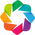

In [102]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas
import panel as pn
from sklearn.metrics import confusion_matrix, roc_curve

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
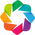

In [103]:
hv.extension('bokeh')
season_text = pn.widgets.StaticText(name='season', value='')

select_season = pn.widgets.RadioBoxGroup(
    name='season', options=['Winter', 'Summer', 'Autumn', 'Spring'],
    inline=True)

workingday_text = pn.widgets.StaticText(name='workingday', value='')
select_workingday = pn.widgets.RadioBoxGroup(
    name='workingday', options=['Yes','No'],
    inline=True)

select_temp = pn.widgets.IntSlider(name='temp', start= int(min(df['temp'])), end= int(max(df['temp'])), step = 1)
@pn.depends(select_season, select_workingday, select_temp)

def exp_plot(select_season, select_workingday, select_temp):
  return df[(df.season==select_season) &(df.workingday==select_workingday) & (df.temp <= select_temp)].sort_values(by='cnt').hvplot(x='cnt', y = 'hum')

pn.Column(season_text, select_season, workingday_text, select_workingday, select_temp, exp_plot).embed()

### **HoloViews Data Distribution Visualization with Interactive Controls:**
Utilization HoloViews and Panel to create an interactive data distribution visualization with widgets for selecting **season, working day, and temperature**.

In [104]:
def hv_confusion_matrix(y_pred,
                        y_test,
                        title='Confusion matrix'):
    tn, fp, fn, tp = confusion_matrix(y_test,  y_pred).ravel()
    pdf = pd.DataFrame(zip(y_pred, y_train), columns=['Prediction', 'Actual'])

    graph = pdf.groupby(['Prediction', 'Actual']).size().to_frame().reset_index()
    confusion = graph.rename(columns={0: 'Count'})
    conf_values = map(lambda l: [str(l[0]), str(l[1]), l[2]], [a.tolist() for a in confusion.values])
    return hv.HeatMap(conf_values, label='Confusion Matrix', kdims=['Predicted', 'Actual'], vdims=['Count']).sort().options(
        xrotation=45, width=500, height=500, cmap='blues', tools=['hover'], invert_yaxis=True, zlim=(0,1))

In [124]:
def hv_roc_curve(y_pred, y_test):
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  roc_df = pd.DataFrame(zip(fpr, tpr), columns=['Specificity', 'Sensitivity'])
  return roc_df.hvplot(x='Specificity', y = 'Sensitivity')
def upsample(df, n):
  df = resample(df, n_samples=n, replace=True)
  return df
def downsample(df, n):
  df = resample(df, n_samples=n, replace=False)
  return df

In [125]:
from sklearn.utils import resample

In [126]:
random = pd.concat( [X, df['holiday']], axis = 1)
random = resample(random)
random_tar = random['holiday'].fillna(0)
random.drop(['holiday'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(random, random_tar, random_state = 10, test_size = 0.2)
muller_classification(X_train, X_test, y_train, y_test)

Linear Regression
Classifier = Linear Regression, Score (test, accuracy) = 98.43,
MLP Regressor
Classifier = MLP Regressor, Score (test, accuracy) = 96.58,
RandomForest Regressor
Classifier = RandomForest Regressor, Score (test, accuracy) = 98.43,
Gradient Boosting Regressor
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 96.79,
KNeighbors Regressor
Classifier = KNeighbors Regressor, Score (test, accuracy) = 96.58,
Best --> Classifier = Linear Regression, Score (test, accuracy) = 98.43


,Classifier,MSE,MAE,RSquared,Test Accuracy,Recall,Precision
0,KNeighbors Regressor,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
1,Gradient Boosting Regressor,0.030000,0.030000,0.030000,96.786534,0.967865,0.959400
2,RandomForest Regressor,0.020000,0.020000,0.530000,98.431523,0.984315,0.984566
3,MLP Regressor,0.030000,0.030000,-0.040000,96.576129,0.965761,0.932695
4,Linear Regression,0.020000,0.020000,0.530000,98.431523,0.984315,0.983241


In [109]:
from sklearn.utils import resample

def exp_plot(event):
  temp_df = pd.concat( [X, df['holiday']], axis = 1)
  temp_df = resample(temp_df)
  temp_target = temp_df['holiday'].fillna(0)
  temp_train_df = temp_df.drop(['holiday'], axis=1)
  X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(temp_train_df, temp_target, random_state = 10, test_size = 0.2)
  muller_classification(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
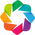

Linear Regression 
Classifier = Linear Regression, Score (test, accuracy) = 98.32, 
MLP Regressor 
Classifier = MLP Regressor, Score (test, accuracy) = 95.94, 
RandomForest Regressor 
Classifier = RandomForest Regressor, Score (test, accuracy) = 98.05, 
Gradient Boosting Regressor 
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 96.08, 
KNeighbors Regressor 
Classifier = KNeighbors Regressor, Score (test, accuracy) = 95.94, 
Best --> Classifier = Linear Regression, Score (test, accuracy) = 98.32 
Linear Regression 
Classifier = Linear Regression, Score (test, accuracy) = 98.37, 
MLP Regressor 
Classifier = MLP Regressor, Score (test, accuracy) = 95.91, 
RandomForest Regressor 
Classifier = RandomForest Regressor, Score (test, accuracy) = 98.14, 
Gradient Boosting Regressor 
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 96.02, 
KNeighbors Regressor 
Classifier = KNeighbors Regressor, Score (test, accuracy) = 95.91, 
Best --> Classifier = Linear Regression, Score (test, accuracy) = 98.37 
Linear Regression 
Classifier = Linear Regression, Score (test, accuracy) = 98.57, 
MLP Regressor 
Classifier = MLP Regressor, Score (test, accuracy) = 96.58, 
RandomForest Regressor 
Classifier = RandomForest Regressor, Score (test, accuracy) = 98.30, 
Gradient Boosting Regressor 
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 96.61, 
KNeighbors Regressor 
Classifier = KNeighbors Regressor, Score (test, accuracy) = 96.58, 
Best --> Classifier = Linear Regression, Score (test, accuracy) = 98.57

Column
    [0] StaticText(name='Select Number o...)
    [1] IntSlider(end=506, name='SampleSize', start=100, step=10, value=100)
    [2] Button(button_type='primary', name='Run Muller Loop')

In [110]:
hv.extension('bokeh')

samples_text = pn.widgets.StaticText(name='Select Number of Samples', value='')
select_sample_size = pn.widgets.IntSlider(name='SampleSize', start= 100, end= 506, step = 10)

button = pn.widgets.Button(name='Run Muller Loop', button_type='primary')

button.on_click(exp_plot)
pn.Column(samples_text, select_sample_size, button)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
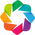

In [127]:
hv.extension('bokeh')
model_text = pn.widgets.StaticText(name='Model', value='')
select_model = pn.widgets.RadioBoxGroup( name='model', options=["Linear Regression", "MLP Regressor", "RandomForest Regressor", "Gradient Boosting Regressor", "KNeighbors Regressor"], inline=True)

@pn.depends(select_model)
def plot_conf_roc(select_model):
  y_test = m_pred[select_model]['y_test']
  y_pred = m_pred[select_model]['y_pred']

  return hv_roc_curve(y_pred,y_test) + hv_confusion_matrix(y_pred,y_test)
pn.Column(model_text, select_model, plot_conf_roc).embed()